In [35]:
%run LoserAnalysis.ipynb

KeyboardInterrupt: 

KeyboardInterrupt: 

# Plot x for fixed y & z

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
TIME_LIM = 60  # seconds

In [4]:
y = 100
z = 100
xs = range(1,301)
probs = {}

for x in xs:
    state = (x,y,z)
    # Set up signal handler for SIGALRM, saving previous value
    oldHandler = signal.signal(signal.SIGALRM, sigalarmHandler)
    # Start timer
    signal.alarm(TIME_LIM)
    try:
        probs[state] = LoserAnalysis(state).getHittingProb()
    except TimeoutException:
        print(f'Took too long to find the hitting prob for state {state}')
    except RecursionError:
        print(f'maximum recursion depth exceeded for state {state}')
    finally:
        # Turn off timer
        signal.alarm(0)
        # Restore handler to previous value
        signal.signal(signal.SIGALRM, oldHandler)

maximum recursion depth exceeded for state (1, 100, 100)
Took too long to find the hitting prob for state (2, 100, 100)
Took too long to find the hitting prob for state (3, 100, 100)
Took too long to find the hitting prob for state (4, 100, 100)
Took too long to find the hitting prob for state (6, 100, 100)
Took too long to find the hitting prob for state (7, 100, 100)
Took too long to find the hitting prob for state (8, 100, 100)
Took too long to find the hitting prob for state (9, 100, 100)
Took too long to find the hitting prob for state (11, 100, 100)
Took too long to find the hitting prob for state (12, 100, 100)
Took too long to find the hitting prob for state (13, 100, 100)
Took too long to find the hitting prob for state (14, 100, 100)
Took too long to find the hitting prob for state (16, 100, 100)
Took too long to find the hitting prob for state (17, 100, 100)
Took too long to find the hitting prob for state (18, 100, 100)
Took too long to find the hitting prob for state (19, 

Took too long to find the hitting prob for state (156, 100, 100)
maximum recursion depth exceeded for state (157, 100, 100)
maximum recursion depth exceeded for state (158, 100, 100)
maximum recursion depth exceeded for state (159, 100, 100)
maximum recursion depth exceeded for state (161, 100, 100)
Took too long to find the hitting prob for state (162, 100, 100)
maximum recursion depth exceeded for state (163, 100, 100)
Took too long to find the hitting prob for state (164, 100, 100)
Took too long to find the hitting prob for state (165, 100, 100)
maximum recursion depth exceeded for state (166, 100, 100)
maximum recursion depth exceeded for state (167, 100, 100)
Took too long to find the hitting prob for state (168, 100, 100)
maximum recursion depth exceeded for state (169, 100, 100)
maximum recursion depth exceeded for state (171, 100, 100)
Took too long to find the hitting prob for state (172, 100, 100)
maximum recursion depth exceeded for state (173, 100, 100)
Took too long to fin

In [5]:
# use numerical approximation for the unrecorded states
missedStates = [(x,y,z) for x in xs if (x,y,z) not in probs]
numericalProbs = {s:LoserAnalysis(s).getHittingProbNumerical() for s in missedStates}
numericalProbs

{(1, 100, 100): 0.53313,
 (2, 100, 100): 0.53559,
 (3, 100, 100): 0.53237,
 (4, 100, 100): 0.53067,
 (6, 100, 100): 0.52846,
 (7, 100, 100): 0.52652,
 (8, 100, 100): 0.52144,
 (9, 100, 100): 0.52516,
 (11, 100, 100): 0.52071,
 (12, 100, 100): 0.5169,
 (13, 100, 100): 0.52071,
 (14, 100, 100): 0.51174,
 (16, 100, 100): 0.50876,
 (17, 100, 100): 0.50317,
 (18, 100, 100): 0.50314,
 (19, 100, 100): 0.50167,
 (21, 100, 100): 0.49605,
 (22, 100, 100): 0.49384,
 (23, 100, 100): 0.49365,
 (24, 100, 100): 0.49477,
 (26, 100, 100): 0.48614,
 (27, 100, 100): 0.48147,
 (28, 100, 100): 0.48517,
 (29, 100, 100): 0.47995,
 (31, 100, 100): 0.47486,
 (32, 100, 100): 0.47544,
 (33, 100, 100): 0.47287,
 (34, 100, 100): 0.4502,
 (35, 100, 100): 0.44804,
 (36, 100, 100): 0.44972,
 (37, 100, 100): 0.44767,
 (38, 100, 100): 0.44535,
 (39, 100, 100): 0.44626,
 (41, 100, 100): 0.44345,
 (42, 100, 100): 0.43653,
 (43, 100, 100): 0.4391,
 (44, 100, 100): 0.43987,
 (45, 100, 100): 0.4372,
 (46, 100, 100): 0.43582

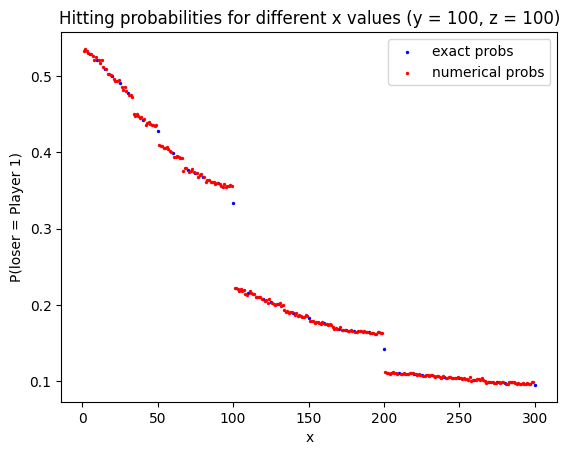

In [31]:
# plot x (1-300) for fixed y & z (100)

plt.scatter([s[0] for s in probs.keys()], probs.values(), 
            color='b', label='exact probs', s=2)
plt.scatter([s[0] for s in numericalProbs.keys()], numericalProbs.values(), 
            color='r', label='numerical probs', s=2)

# add graph features
plt.xlabel('x')
plt.ylabel('P(loser = Player 1)')
plt.title("Hitting probabilities for different x values (y = 100, z = 100)")
plt.legend()

plt.savefig('Hitting probs for different x (y = 100, z = 100).png')
plt.show()

## Generalize the process

In [32]:
FIG_NAME = f'Hitting probs for different x (y = {y}, z = {z}).png'

In [37]:
# Automate the process
def plotXforFixedYZ(minX, maxX, y, z, figName=FIG_NAME, timeLimit=60):
    """
    Plots x values within the range [`minX`, `maxX`] (inclusive) for fixed y and z.
    The `timeLimit` (in seconds) casts a limit on the computation time of the hitting prob for each state.
    Saves the plot to a file provided by the string `figName`.
    """
    xs = range(minX, maxX+1)
    probs = {}
    
    for x in xs:
        state = (x,y,z)
        # Set up signal handler for SIGALRM, saving previous value
        oldHandler = signal.signal(signal.SIGALRM, sigalarmHandler)
        # Start timer
        signal.alarm(TIME_LIM)
        try:
            probs[state] = LoserAnalysis(state).getHittingProb()
        except TimeoutException:
            print(f'Took too long to find the hitting prob for state {state}')
        except RecursionError:
            print(f'maximum recursion depth exceeded for state {state}')
        finally:
            # Turn off timer
            signal.alarm(0)
            # Restore handler to previous value
            signal.signal(signal.SIGALRM, oldHandler)
        
    # use numerical approximation for the unrecorded states
    missedStates = [(x,y,z) for x in xs if (x,y,z) not in probs]
    numericalProbs = {s:LoserAnalysis(s).getHittingProbNumerical() for s in missedStates}
    
    # plot
    plt.scatter([s[0] for s in probs.keys()], probs.values(), 
            color='b', label='exact probs', s=2)
    plt.scatter([s[0] for s in numericalProbs.keys()], numericalProbs.values(), 
                color='r', label='numerical probs', s=2)

    # add graph features
    plt.xlabel('x')
    plt.ylabel('P(loser = Player 1)')
    plt.title(f"Hitting probabilities for different x values (y = {y}, z = {z})")
    plt.legend()

    plt.savefig(FIG_NAME)
    plt.show()

maximum recursion depth exceeded for state (1, 100, 200)
maximum recursion depth exceeded for state (2, 100, 200)
maximum recursion depth exceeded for state (3, 100, 200)
Took too long to find the hitting prob for state (4, 100, 200)
Took too long to find the hitting prob for state (5, 100, 200)
maximum recursion depth exceeded for state (6, 100, 200)
maximum recursion depth exceeded for state (7, 100, 200)
Took too long to find the hitting prob for state (8, 100, 200)
maximum recursion depth exceeded for state (9, 100, 200)
maximum recursion depth exceeded for state (11, 100, 200)
Took too long to find the hitting prob for state (12, 100, 200)
maximum recursion depth exceeded for state (13, 100, 200)
maximum recursion depth exceeded for state (14, 100, 200)
Took too long to find the hitting prob for state (15, 100, 200)
Took too long to find the hitting prob for state (16, 100, 200)
maximum recursion depth exceeded for state (17, 100, 200)
maximum recursion depth exceeded for state (1

maximum recursion depth exceeded for state (154, 100, 200)
Took too long to find the hitting prob for state (155, 100, 200)
Took too long to find the hitting prob for state (156, 100, 200)
maximum recursion depth exceeded for state (157, 100, 200)
maximum recursion depth exceeded for state (158, 100, 200)
maximum recursion depth exceeded for state (159, 100, 200)
maximum recursion depth exceeded for state (161, 100, 200)
Took too long to find the hitting prob for state (162, 100, 200)
maximum recursion depth exceeded for state (163, 100, 200)
maximum recursion depth exceeded for state (164, 100, 200)
Took too long to find the hitting prob for state (165, 100, 200)
maximum recursion depth exceeded for state (166, 100, 200)
maximum recursion depth exceeded for state (167, 100, 200)
Took too long to find the hitting prob for state (168, 100, 200)
maximum recursion depth exceeded for state (169, 100, 200)
maximum recursion depth exceeded for state (171, 100, 200)
maximum recursion depth ex

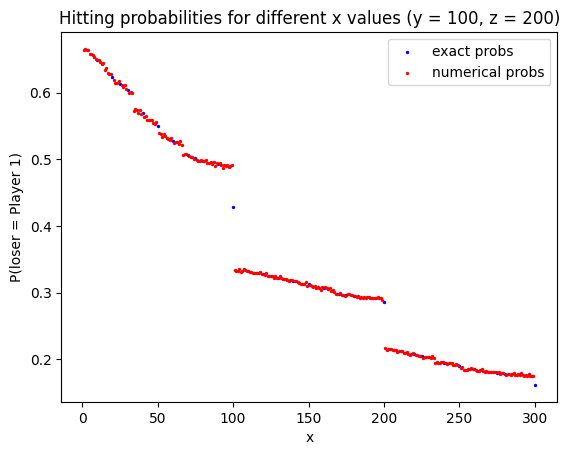

In [38]:
plotXforFixedYZ(1, 300, 100, 200, timeLimit=30)

In [42]:
class TimeoutException(Exception):
    """
    Custom exception for timeout.
    """
    pass

def sigalarmHandler(signum, frame):
    """
    Handler function to be called when SIGALRM is received.
    """
    # We get signal!
    raise TimeoutException()

Took too long to find the hitting prob for state (9, 20, 20)
Took too long to find the hitting prob for state (11, 20, 20)
Took too long to find the hitting prob for state (13, 20, 20)
Took too long to find the hitting prob for state (17, 20, 20)
Took too long to find the hitting prob for state (19, 20, 20)
Took too long to find the hitting prob for state (21, 20, 20)
Took too long to find the hitting prob for state (23, 20, 20)
Took too long to find the hitting prob for state (27, 20, 20)
Took too long to find the hitting prob for state (29, 20, 20)
Took too long to find the hitting prob for state (31, 20, 20)
Took too long to find the hitting prob for state (33, 20, 20)
Took too long to find the hitting prob for state (37, 20, 20)
Took too long to find the hitting prob for state (39, 20, 20)
Took too long to find the hitting prob for state (41, 20, 20)
Took too long to find the hitting prob for state (43, 20, 20)
Took too long to find the hitting prob for state (47, 20, 20)
Took too 

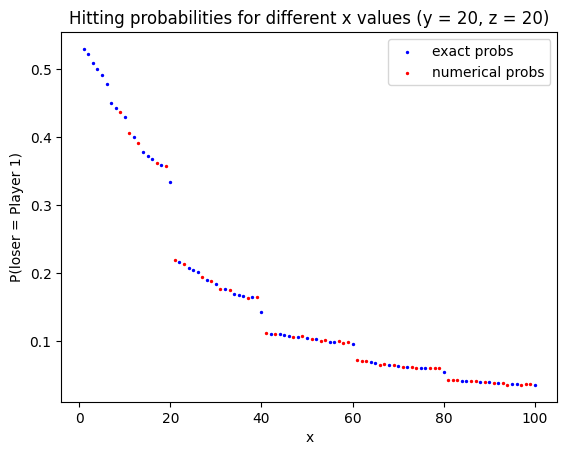

In [39]:
plotXforFixedYZ(1, 100, 20, 20, timeLimit=30)

In [41]:
plotXforFixedYZ(1, 1000, 200, 200, timeLimit=20)

maximum recursion depth exceeded for state (1, 200, 200)
Took too long to find the hitting prob for state (2, 200, 200)
maximum recursion depth exceeded for state (3, 200, 200)
Took too long to find the hitting prob for state (4, 200, 200)
Took too long to find the hitting prob for state (5, 200, 200)
Took too long to find the hitting prob for state (6, 200, 200)
maximum recursion depth exceeded for state (7, 200, 200)
Took too long to find the hitting prob for state (8, 200, 200)
maximum recursion depth exceeded for state (9, 200, 200)
maximum recursion depth exceeded for state (11, 200, 200)
Took too long to find the hitting prob for state (12, 200, 200)
maximum recursion depth exceeded for state (13, 200, 200)
Took too long to find the hitting prob for state (14, 200, 200)
Took too long to find the hitting prob for state (15, 200, 200)
Took too long to find the hitting prob for state (16, 200, 200)
maximum recursion depth exceeded for state (17, 200, 200)
Took too long to find the h

maximum recursion depth exceeded for state (151, 200, 200)
Took too long to find the hitting prob for state (152, 200, 200)
maximum recursion depth exceeded for state (153, 200, 200)
maximum recursion depth exceeded for state (154, 200, 200)
Took too long to find the hitting prob for state (155, 200, 200)
maximum recursion depth exceeded for state (156, 200, 200)
maximum recursion depth exceeded for state (157, 200, 200)
maximum recursion depth exceeded for state (158, 200, 200)
maximum recursion depth exceeded for state (159, 200, 200)
maximum recursion depth exceeded for state (161, 200, 200)
maximum recursion depth exceeded for state (162, 200, 200)
maximum recursion depth exceeded for state (163, 200, 200)
maximum recursion depth exceeded for state (164, 200, 200)
Took too long to find the hitting prob for state (165, 200, 200)
maximum recursion depth exceeded for state (166, 200, 200)
maximum recursion depth exceeded for state (167, 200, 200)
Took too long to find the hitting prob

maximum recursion depth exceeded for state (298, 200, 200)
maximum recursion depth exceeded for state (299, 200, 200)
maximum recursion depth exceeded for state (301, 200, 200)
maximum recursion depth exceeded for state (302, 200, 200)
maximum recursion depth exceeded for state (303, 200, 200)
Took too long to find the hitting prob for state (304, 200, 200)
maximum recursion depth exceeded for state (305, 200, 200)
maximum recursion depth exceeded for state (306, 200, 200)
maximum recursion depth exceeded for state (307, 200, 200)
maximum recursion depth exceeded for state (308, 200, 200)
maximum recursion depth exceeded for state (309, 200, 200)
Took too long to find the hitting prob for state (310, 200, 200)
maximum recursion depth exceeded for state (311, 200, 200)
Took too long to find the hitting prob for state (312, 200, 200)
maximum recursion depth exceeded for state (313, 200, 200)
maximum recursion depth exceeded for state (314, 200, 200)
maximum recursion depth exceeded for s

TimeoutException: 

In [ ]:
# adapt fixed sum code to varying x for fixed y&z